# Reddit Subreddit Clean-up & EDA

#### Jump To:
- [Reading & Assessing our Dataset](#Asses)
- [Cleaning](#clean)
- [Combine Subreddit DataFrames](#combine)
- [Count Vectorizer](#count)
- [Save for Modeling](#save)

In [1]:
# my needed imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text # to add more stopwords

pd.options.display.max_colwidth = 400 # setting to display up to 400 characters in a column

<a id='Asses'></a> 
## Importing 
Import the created CSVs from our post acquisition notebook, One CSV contains 9k posts while the other contains 7k, that's because I noticed in the 'AmITheAsshole' subreddit that there were alot of user and mod removed posts that still made it through the filter, to play it on the safe side and prevent unnecessary extra pulls, I pulled in more on this one compared to 'JustNoMIL'.

In [2]:
ami = pd.read_csv('./data/AmITheAsshole.csv', index_col=0)
justno = pd.read_csv('./data/JustNoMIL.csv', index_col=0)

In [3]:
ami.head()

,author,title,selftext,subreddit
0,[deleted],AITA For Not Allowing My Son Near My Foster Brother,NaN,AmItheAsshole
1,[deleted],AITA For Removing My Comments And Blocking A (ex)Friend,[deleted],AmItheAsshole
2,CantSeemToFindAName,AITA for calling in sick after a heated argument wiht my Coworker?,[removed],AmItheAsshole
3,Ed4434,AITA for asking my partner to cancel plans with her friend because I wanted to do with her the thing she had planned to do with her friend?,"I (26/M) have been dealing with bipolar depression recently and haven't been as cheerful as usual and I know this is taking a toll on my partner (22/F). She has a male friend with whom she spends a lot of time, and I am fine with this. In fact, I encourage her to do so, so that she doesn't feel like she needs to spend all her time with me, lest she get bored or start to resent me.\n\nYesterday...",AmItheAsshole
4,IgorJustSomebody,AITA for lying to my mom about praying and believing in God,"So I'm 19M and have issues with my family if you can guess. When I was little, my mom always used to teach me prayers and read Kid's Bible to me (I don't know what this is called or if it exists in English, but it's basically stories from the Bible with illustrations). My mom also made me, well I agreed at that time but she was the person who always pushed me, to be in Church choir. I sung in ...",AmItheAsshole


In [4]:
justno.head()

,author,title,selftext,subreddit
0,Low_Potatoes,MIL says I'm the manipulative one?,"Throwaway account to just vent my frustration with this women.\n\nMy MIL decided to tell my SO I'm the manipulative one is our weird three way relationship which I never consented to. Apparently, I manipulate him by staying over at his house and am going to be a moocher just like his past partner. She is delusional because I have my own place I pay rent as well. It would make no sense for me t...",JUSTNOMIL
1,throw-away1024123,How To Manage The Next 50 Years?,"CW: sexual assault\n\nThrowaway because you never know where a flying monkey could be. TL;DR at the bottom. Sorry, this is loooong. \n\nI’ve been a lurker on this sub for a while, but recently things with my future JNMIL have been really upsetting me and I felt the urge to reach out to all of you here. \n\nFor some background, my fiancé and I have been together for over five years. I can still...",JUSTNOMIL
2,ThrowRA-Barber,I can't stop thinking about the time my mom didn't show up to support my dream.,"My whole life, I had been struggling on finding a career path, it felt like i didn't have any talent or passion, so i bounced around for a few years. Mom convinced me to go to law or nursing, something ""Useful"", i did that. Until i found my true passion last year. Cooking. I just took a liking to it. It allowed me to express my creativity. \n\nIt made me happy and i was actually talented at it...",JUSTNOMIL
3,yikesduchess,The wedding went well! And a few other minor updates,"As of Saturday, DH and I are married. The ceremony went well, everyone stayed outdoors and wore their masks, and it ended up being a lovely low-key day. \n\nDH told me after the reception that MIL tried to call him on his way to the wedding. She was crying and expressed regret that she wasn't going to be there... (As DH and I are fond of saying, ""my, my, isn't it time for the consequences of y...",JUSTNOMIL
4,TyrionsRedCoat,UPDATE: Melancholy Millicent and the Plague,"THE BITCH MANAGED TO GIVE US A COLD.\n\nGod. Fucking. Dammit.\n\nDetails of Millicent's quarantine boundary stomping are in my prior post. Basically she wore a mask but was pouting about it and kept breaking our six-foot bubble we'd told her would be required for a visit. We didn't stay long and at this point, I don't want to see her again until we've both been vaccinated.\n\nWhen I wrote my i...",JUSTNOMIL


<a id ='clean'></a>
## CLEANING

#### Some Functions
- Check dataframes' null values and describe in one
- Drop rows, In these datasets since we are doing Natural Language Processing, it is not ideal to impute the missing values, so all missing values, will need to be dropped


In [5]:
# Function to check each dataframe's null values and describe.

def check_dfs(df):
    desc = df.describe() # assign describe to variable
    add_null = pd.concat([df.isnull().sum().rename('Nulls'),desc.T],axis=1) # concatinate nulls with describe
    return add_null    

# get the .describe of the dataframes
# concatinate the isnull sums to the describe dataframe, the describe table will now be transposed to match the output of nulls
# also renamed the new column as 'Nulls' bc it shows up as 0
# set it on the columns axis

In [6]:
check_dfs(ami)

,Nulls,count,unique,top,freq
author,0,9000,6950,[deleted],407
title,0,9000,8654,AIs from AI Dungeon 2 to sexy to funny and one based wholly on Reddit!,7
selftext,259,8741,5538,[removed],3039
subreddit,0,9000,1,AmItheAsshole,9000


In [7]:
check_dfs(justno)

,Nulls,count,unique,top,freq
author,0,7003,4402,[deleted],131
title,2,7001,6941,BEC Megathread,4
selftext,61,6942,6241,[removed],582
subreddit,4,6999,1,JUSTNOMIL,6999


In [8]:
# Function to drop duplicates and to drop rows containing [removed] and [deleted], even though I added a filter to not
# include moderator or user deleted rows some made it through the filter
# drop posts made by AutoModerator
# drop any Null rows

def drop(df):
    
    df.dropna(inplace=True) # drop nulls
    df.drop_duplicates(inplace=True) # drop duplicates
    df.drop(df[(df['selftext'] == '[removed]') | (df['selftext'] == '[deleted]')].index, inplace=True) #drop removed/deleted
    df.drop(df[(df['author'] == 'AutoModerator')].index, inplace=True) #drop posts by automoderator
    
    return check_dfs(df) # calls function again to get a final view of adjusted describe

    

In [9]:
drop(ami)

,Nulls,count,unique,top,freq
author,0,5552,5288,HSrandom420,6
title,0,5552,5520,AITA - girl from 5 years ago wants to meet me again but do I look different now?,3
selftext,0,5552,5536,🔲 me 5 years ago When we dated \n\nhttps://m.imgur.com/a/YlAAhlA\n(3 photo album)\n\nhttps://m.imgur.com/a/r8z1Djz (side pic same angle as now pics)\n\n\n\n🔲now\n\nhttps://m.imgur.com/a/U1cqVak\n(2018) (she’s seen me on this pic tbh)\n\nhttps://pasteboard.co/Jpp3CS3.png\n(2020)\n\n\nhttps://m.imgur.com/a/5WuLvfA (most recent)\n\n\n◾️5 years ago a girl had a crush on me and now she’s messaged m...,3
subreddit,0,5552,1,AmItheAsshole,5552


As noted when importing that the 'AmITheAsshole' subreddit had alot of [removed] or [deleted] posts that still found their way through, after dropping those rows my 9k long dataframe is now down to 5552 rows.

In [10]:
drop(justno)

,Nulls,count,unique,top,freq
author,0,6247,3989,preppymedstudents,26
title,0,6247,6230,Grandmother ordered to delete Facebook photos under GDPR,2
selftext,0,6247,6235,"After all this time living with my parents, I know very well that everything they do, they think of a return, be it a hug or a gift, everything will be used later.\n\nShopping has become a nightmare, as I always wonder how it will be used the moment I want to move.\n\nI have to be a cold stone, not to show it, my mother tries to make me trust her with secrets and personal things, if I don't sp...",3
subreddit,0,6247,1,JUSTNOMIL,6247


In [11]:
justno.loc[justno['title'].str.contains('asshole')].count()

author       5
title        5
selftext     5
subreddit    5
dtype: int64

Looking at the .describe combo once the drop function has been called I no longer have any nulls in both dataframes, next I will combine both dataframes and start removing somes special characters before count vectorizing.

<a id ='combine'></a>
### <center>Combining 'AmITheAsshole' & 'JustNOMIL'</center>

![SegmentLocal](https://media.giphy.com/media/P4TqKx6NHyLnO/giphy.gif "segment")

In [12]:
df = ami.append(justno, ignore_index=True) # ignore index continues the index number from the first df.
df.shape

(11799, 4)

#### Removing special characters
The two most prominent things I noticed was that the posts contained '\n' and '.&amp;#x200B;'. I will remove those with str.replace and will look more into what else needs to be removed after count vectorizing.

In [13]:
df['selftext'] = df['selftext'].str.replace('\n', ' ') 
# title had a /n but it was not in the context i needed to remove (yes/no or low/no)

In [14]:
df['selftext'] = df['selftext'].str.replace('&amp;#x200B;', ' ')

In [15]:
df.head()

,author,title,selftext,subreddit
0,Ed4434,AITA for asking my partner to cancel plans with her friend because I wanted to do with her the thing she had planned to do with her friend?,"I (26/M) have been dealing with bipolar depression recently and haven't been as cheerful as usual and I know this is taking a toll on my partner (22/F). She has a male friend with whom she spends a lot of time, and I am fine with this. In fact, I encourage her to do so, so that she doesn't feel like she needs to spend all her time with me, lest she get bored or start to resent me. Yesterday s...",AmItheAsshole
1,IgorJustSomebody,AITA for lying to my mom about praying and believing in God,"So I'm 19M and have issues with my family if you can guess. When I was little, my mom always used to teach me prayers and read Kid's Bible to me (I don't know what this is called or if it exists in English, but it's basically stories from the Bible with illustrations). My mom also made me, well I agreed at that time but she was the person who always pushed me, to be in Church choir. I sung in ...",AmItheAsshole
2,natalieung,AITA I do not want to invest in home just so I won't potentially get stuck with brother,"Hi all, I'm 22 and have been contemplating buying a house but have decided to hold off because I know it would mean I would have to bring my younger siblings along. I currently live with my parents and two younger brothers( 13 and 8 years old). I know if I buy a house now my parents will want to invest in the home and come with me, that's not what I want but I know they will probs force me to ...",AmItheAsshole
3,RNinlimbo,WIBTA if I didn‘t take my child to see her possibly dying father?,My ex husband left my daughter and I when she was 10 months old and now she’s 4. He hasn’t seen her or made a real effort to do so. He hasn’t paid child support and the most he has done was send a few selfies here and there. I have been going minimal contact with him because it always seems like he just wants to fight through text messages. I’ve moved on and my daughter knows about her father...,AmItheAsshole
4,anonym-name,AITA for telling my partner's friend I'll kick him out if he brings marijuana to my apartment,"This involves me (25M) my partner (27M) and his friend (26M). So marijuana, weed whatever you want to call it is illegal to own and consume in our country. Despite that I do know that many people use it such as my partner's friend and when they're hanging out together, my partner sometimes smokes too. I don't really approve but I know it's not as bad as other drugs, so I don't tell my partne...",AmItheAsshole


### Visualizing the number of words used per subreddit

In [16]:
df['post_word_count'] = [len(word.split()) for word in df['selftext']] # number of words in post
df['title_word_count'] = [len(word.split()) for word in df['title']] # number of words in title

In [17]:
df.groupby('subreddit')[['title_word_count', 'post_word_count']].mean().round()

,title_word_count,post_word_count
subreddit,,
AmItheAsshole,12.0,330.0
JUSTNOMIL,9.0,547.0


Looking at the title and word count, I can see that the users in AMITheAsshole subreddit have longer titles, but shorter posts compared to JustNOMIL who is the oposite, with generally shorter titles but longer posts. 

In [18]:
# 2 tables to get the visualization going
ami_c = df.loc[df['subreddit'] == 'AmItheAsshole']
justno_c = df.loc[df['subreddit'] == 'JUSTNOMIL'] 

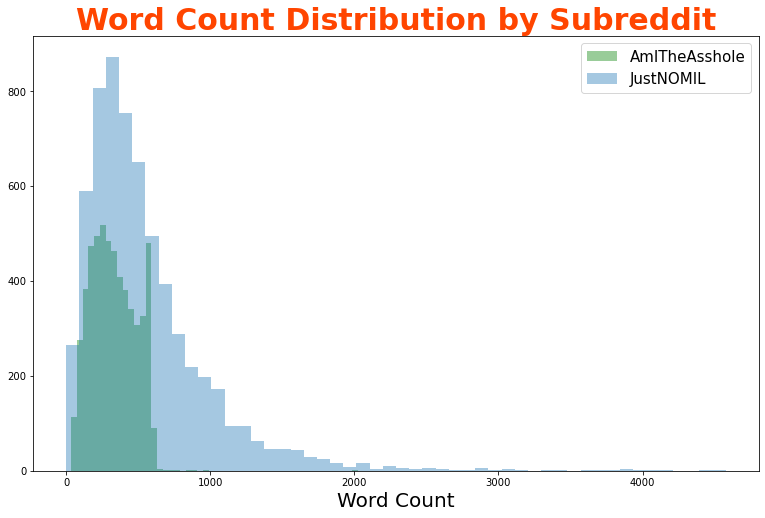

In [19]:
plt.figure(figsize = (13,8))
sns.distplot(ami_c['post_word_count'], label = 'AmITheAsshole', color ='green', kde=False)
sns.distplot(justno_c['post_word_count'], label = 'JustNOMIL',  kde=False);

plt.title('Word Count Distribution by Subreddit', size =30, color ='#FF4500', weight='bold')
plt.xlabel('Word Count', size = 20)
plt.legend(fontsize=15);
plt.savefig('./visuals/word_count.png', transparent=True, bbox_inches='tight')

### Visualizing the number of unique users per subreddit 

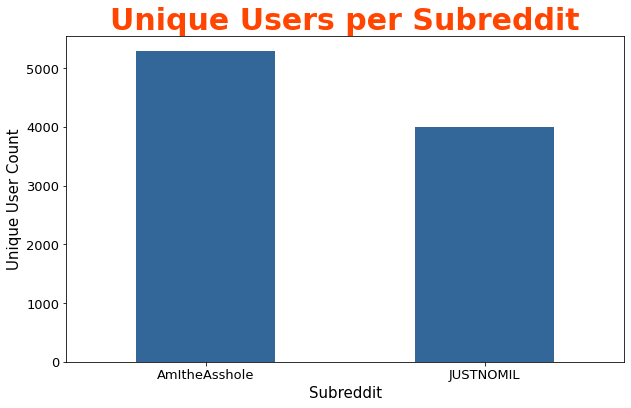

In [20]:
plt.figure(figsize=(10,6))

unique_users = df.groupby('subreddit')['author'].nunique()
ax = unique_users.plot(kind='bar', color="#336699", fontsize=13);
ax.set_title("Unique Users per Subreddit",  size =30, color ='#FF4500', weight='bold')
plt.xticks(rotation=0) # this plot wa making the words go at 90 degree, had to fix
ax.set_ylabel("Unique User Count", fontsize=15)
ax.set_xlabel("Subreddit", fontsize=15)
plt.savefig('./visuals/unique_count.png', transparent=True,)
plt.show()


Before I continue I need to make a dummy column for the subreddit types.
- 1 : AmITheAsshole
- 2 : JustNOMIL

In [21]:
df['sub_reddit'] = df['subreddit'].map({'AmItheAsshole' : 1, 'JUSTNOMIL' : 0}) # new subreddit column with 0 and 1

In [22]:
df.drop('subreddit', axis=1, inplace=True) # dropping original subreddit column (reason below)

I also want to see how many users have posted in both subreddits to help me decide if I will use author in my models

In [23]:
common = pd.merge(ami, justno, how='inner', on=['author'])
print(f'Out of {df.shape[0]}, there are {common.shape[0]} users that posts in both subreddits') 

Out of 11799, there are 55 users that posts in both subreddits


Based on this I will not use the author names, as the model might become too depended on this column in it's predictions

<a id = 'count'> </a>
## COUNT VECTORIZER EDA
I am going to do some EDA on the Count Vectorizer, the purpose is so that I can figure out what additional words I need to add to the stop words. 
- These are my findings during my EDA:
    - I could not concat and iterate through the subreddit column, because the word subreddit showed up in the text, I have adjusted above to say sub_reddit instead.
    - MIL, AITA, WIBTA might need to be added to stop words to prevent too strong of a dependency

In [24]:
cv = CountVectorizer( analyzer = 'word',
                     lowercase = False) # lowercase= False will still allow stop_words to come up, but I need to see this for now

feat = cv.fit_transform(df['title'] + df['selftext']) # the 2 columns to vectorize

In [25]:
word_cv = pd.DataFrame(feat.toarray(), columns= cv.get_feature_names()) # creating a dataframe
word_cv = pd.concat([word_cv, df.iloc[:, -1:]], axis =1) # concatinating the subreddits to the count vectorizer for EDA

In [26]:
word_cv.head()

,00,000,000AUD,000km,005,00PM,00am,00ish,00pm,01,...,𝘸𝘢𝘯𝘵,𝘸𝘢𝘴,𝘸𝘦𝘯𝘵,𝘸𝘩𝘦𝘳𝘦,𝘸𝘩𝘰,𝘸𝘪𝘥𝘦,𝘸𝘰𝘯,𝘸𝘰𝘳𝘬,𝘺𝘰𝘶,sub_reddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# I'll reuse part of a function I made in my NLP lab, to get a count of how many capitalized words each subreddit used.
cap_count = []

def cap_words(val):
    df = pd.DataFrame(word_cv.loc[word_cv['sub_reddit'] == val]) # based on subreddit
    count_upper = df.iloc[:,:-1][[col for col in df if col.isupper()]].sum().sum() # give a total count of how many words with all caps
    cap_count.append(count_upper) # append to empty list for visuals
   

In [28]:
cap_words(1) #AMI
cap_words(0) #JUSTNO

In [29]:
cap_count

[19830, 71839]

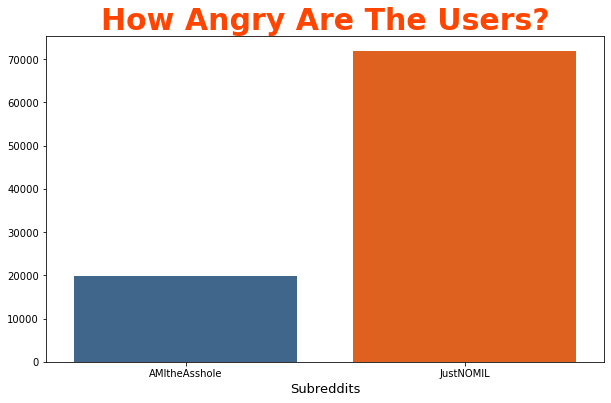

In [30]:
plt.figure(figsize=(10,6))

r = [0,1]
color = ["#336699", '#FF5700']

sns.barplot(r, cap_count, palette= color)

plt.xticks(r, ['AMItheAsshole','JustNOMIL'])
plt.xlabel("Subreddits", size =13)
plt.title('How Angry Are The Users?', size =30, color ='#FF4500', weight='bold');
plt.savefig('./visuals/caps_count.png', transparent=True, bbox_inches='tight')

Users in the JustNOMIL subreddit use alot more capitalized letters than those in the AMITheAsshole subreddit, which makes sense, because those posting in MIL are venting their frustration, compared to those posting in AMI who are looking for perspective and validation.

#### Re-Instantiating CountVectorizer
This time with stopwords to get an idea of the most frequent words (using stopwords and lowercase=False voids the stopwords)

In [31]:
# Doing it again, this time with stopwords
cv = CountVectorizer( analyzer = 'word',
                     stop_words = 'english') # lowercase= False will still allow stop_words to come up, but I need to see this for now

feat = cv.fit_transform(df['title'] + df['selftext']) # the 2 columns to vectorize

word_cv = pd.DataFrame(feat.toarray(), columns= cv.get_feature_names()) # creating a dataframe


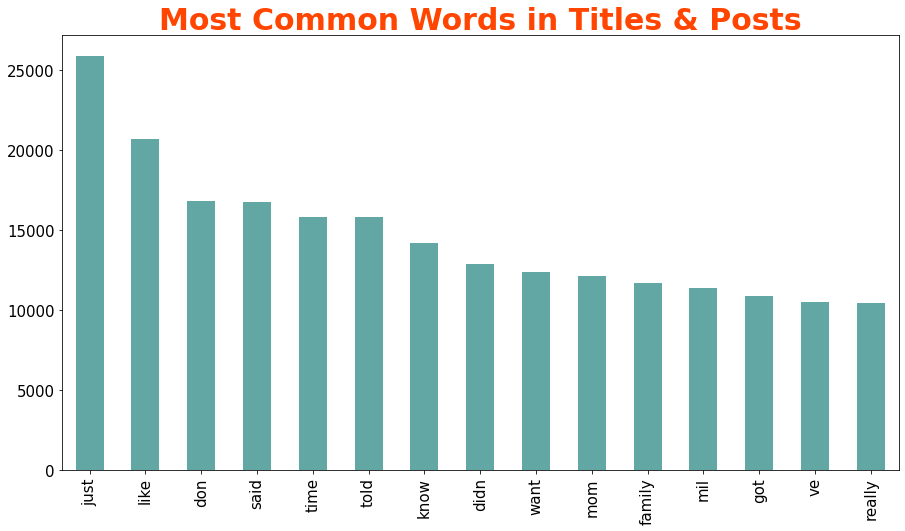

In [32]:
plt.figure(figsize=(15,8))
word_cv.sum().sort_values(ascending=False).head(15).plot(kind='bar', color= '#62A7A4')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most Common Words in Titles & Posts', size =30, color ='#FF4500', weight='bold');
plt.savefig('./visuals/top_words_cv.png', transparent=True, bbox_inches='tight')

<a id='save'></a>
## SAVE
I'll save the combine dataframe only for now and not the CountVectorizer, in the next note book I will re-
CountVectorize with the proper stopwords and making all columns lower case so the stop words are considered.

In [33]:
# Saving the changes as they are now
df.to_pickle('./data/cleaned_combined.pkl')